In [1]:
from google.oauth2 import service_account
from google.cloud import bigquery
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import font_manager,rc

In [3]:
credentials = service_account.Credentials.from_service_account_file("./teamproject_key.json")

In [4]:
client = bigquery.Client(
    credentials = credentials,
    project = credentials.project_id
)

In [5]:
p_dui = """
SELECT
    FORMAT_DATE('%Y-%m', `teamproject-428905.kim.re_monthly_dui`.`날짜`) AS date,
    `teamproject-428905.kim.precipitate`.avg, 
    `teamproject-428905.kim.re_monthly_dui`.`사고`
FROM
	`teamproject-428905.kim.re_monthly_dui`
JOIN
	`teamproject-428905.kim.precipitate`
ON
	FORMAT_DATE('%Y-%m', `teamproject-428905.kim.re_monthly_dui`.`날짜`) = FORMAT_DATE('%Y-%m', `teamproject-428905.kim.precipitate`.date)
"""

In [6]:
p_dui_df = client.query(p_dui).to_dataframe()

C:\Users\rlawn\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [8]:
p_dui_df = p_dui_df.set_index("date")

In [12]:
p_dui_df = p_dui_df.sort_values(by='date', ascending=True)

In [13]:
p_dui_df

,avg,사고
date,,
2010-01,0.9,2260
2010-02,2.0,2035
2010-03,2.7,2229
2010-04,2.1,2328
2010-05,4.0,2535
...,...,...
2023-08,9.6,1055
2023-09,4.5,1163
2023-10,1.0,1002


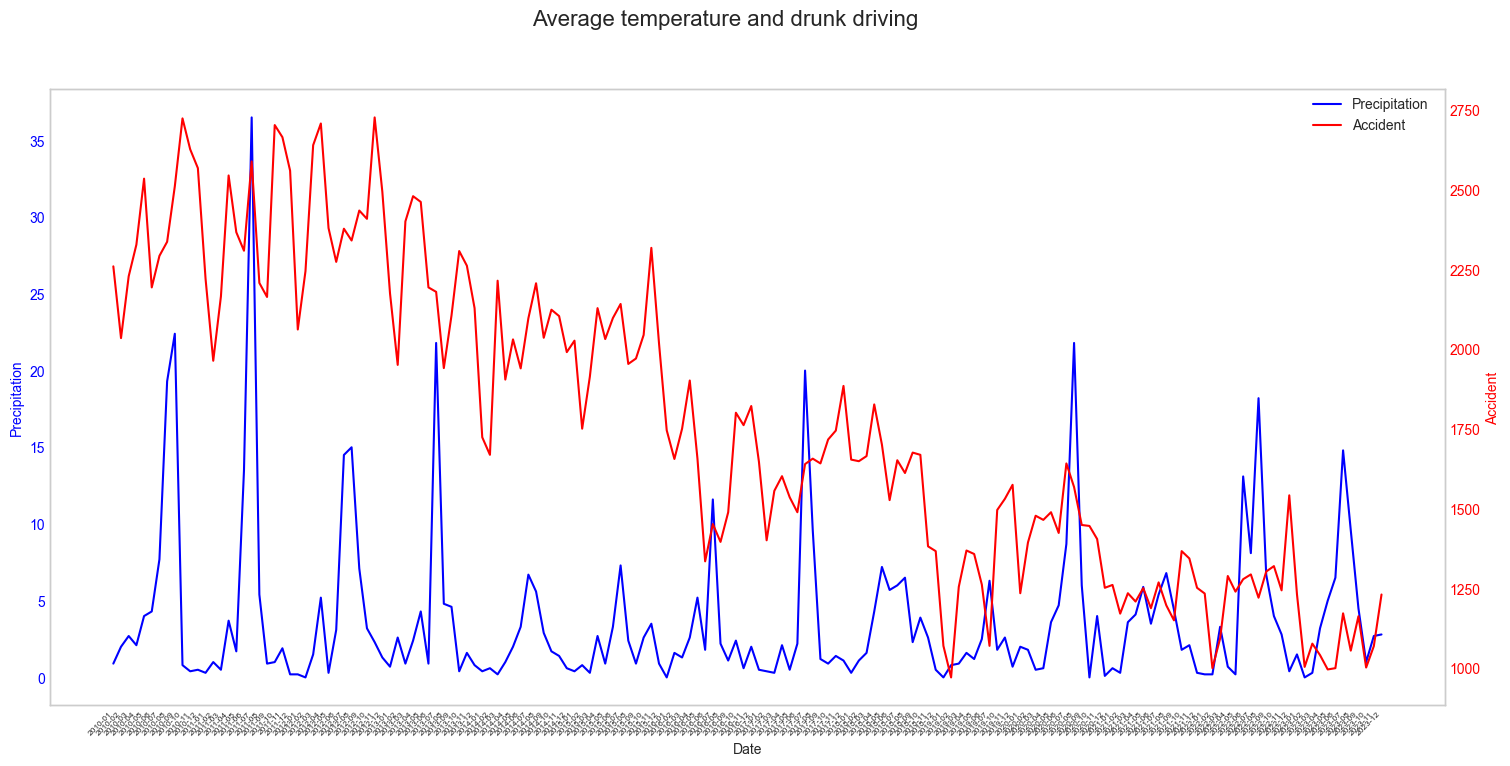

In [18]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax1 = plt.subplots(figsize = (18, 8))

ax1.plot(p_dui_df.index, p_dui_df['avg'], 'b-', label='Precipitation')
ax1.set_xlabel('Date')
ax1.set_ylabel('Precipitation', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.grid(False)
_ = plt.xticks(size = 6, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(p_dui_df.index, p_dui_df['사고'], 'r-', label='Accident')
ax2.set_ylabel('Accident', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.grid(False)

fig.suptitle('Average temperature and drunk driving', fontsize = 16)
fig.legend(loc='upper left', bbox_to_anchor=(0.82, 0.885))